In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalisation
x_train /= 255
x_test /= 255

In [4]:
#Reshaping the dataset 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [5]:
import numpy as np
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [6]:
model = Sequential()

#conv layer 1
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28, 28, 1)))
#Average pooling - replace with max pooling
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Conv layer 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
#Average pooling - replace with max pooling
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Flatten: Convert 2D to 1D
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(120, activation='relu'))

#Fully connected layer 1
model.add(Dense(84, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

#Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [7]:
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2603 - accuracy: 0.9227 - val_loss: 0.0866 - val_accuracy: 0.9717
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.0613 - val_accuracy: 0.9796
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0437 - val_accuracy: 0.9850


## Alexnet archicture

In [ ]:
#Cifar 10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i][0]])

In [16]:
#Alexnet model

model = Sequential()

#Conv 1
model.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', input_shape=(32,32,3)))
#Maxpooling
model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))

#Conv 2
model.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
#Maxpooling
model.add(MaxPool2D(pool_size=(3,3), strides=2))

#Conv 3
model.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))


#Conv 4
model.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

#Conv 5
model.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
#Maxpooling
model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))

#Flatten
model.add(Flatten())

#Dense layer: FCL1
model.add(Dense(4096, activation='relu'))

#Dense layer: FCL2
model.add(Dense(4096, activation='relu'))

#Output
model.add(Dense(10, activation='softmax'))

#Summary
model.summary()

ValueError: Exception encountered when calling layer "max_pooling2d_7" (type MaxPooling2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling2d_7/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 3, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,2,2,256].

Call arguments received by layer "max_pooling2d_7" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 256), dtype=float32)

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=64, validation_data=(x_test, y_test))

## Data augumentation

In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #Data augumentation package
from keras.utils import img_to_array, array_to_img, load_img

In [9]:
image_file = '/Users/pawankumarkc/Downloads/images.jpeg'
cat_image = keras.preprocessing.image.load_img(image_file)

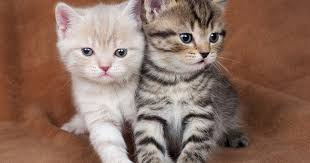

In [5]:
cat_image

In [10]:
cat_image_array = keras.preprocessing.image.img_to_array(cat_image)
cat_image_array

array([[[121.,  75.,  52.],
        [121.,  75.,  52.],
        [120.,  74.,  51.],
        ...,
        [114.,  71.,  54.],
        [114.,  71.,  54.],
        [114.,  71.,  54.]],

       [[123.,  77.,  54.],
        [122.,  76.,  53.],
        [121.,  75.,  52.],
        ...,
        [114.,  71.,  54.],
        [114.,  71.,  54.],
        [114.,  71.,  54.]],

       [[126.,  80.,  57.],
        [125.,  79.,  56.],
        [124.,  78.,  55.],
        ...,
        [114.,  71.,  54.],
        [114.,  71.,  54.],
        [114.,  71.,  54.]],

       ...,

       [[157., 112.,  89.],
        [154., 109.,  86.],
        [161., 116.,  93.],
        ...,
        [139.,  96.,  77.],
        [139.,  96.,  77.],
        [139.,  96.,  77.]],

       [[156., 111.,  88.],
        [153., 108.,  85.],
        [160., 115.,  92.],
        ...,
        [139.,  96.,  77.],
        [139.,  96.,  77.],
        [139.,  96.,  77.]],

       [[155., 110.,  87.],
        [153., 108.,  85.],
        [160., 1

In [11]:
#Using data augumentation method

def plot_image(original_inage, augumented_image):
    plt.figure(figsize=(14,8))
    #original image
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.show(original_inage)

    #original image
    plt.subplot(1,2,2)
    plt.title('Augumented Image')
    plt.show(augumented_image)

    plt.show()

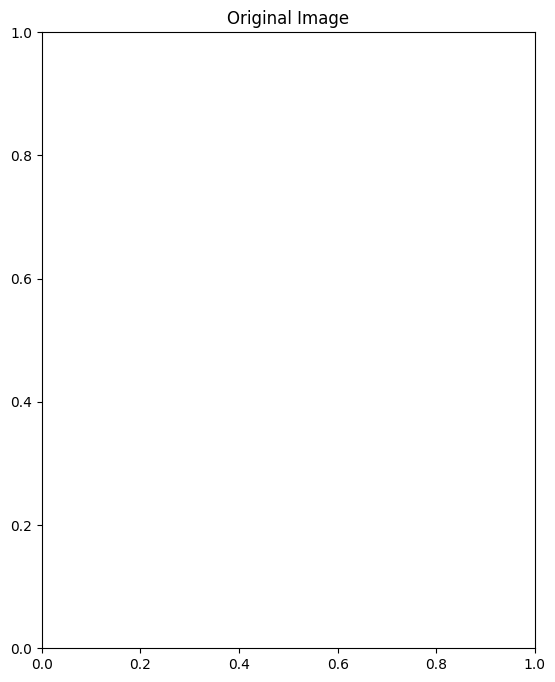

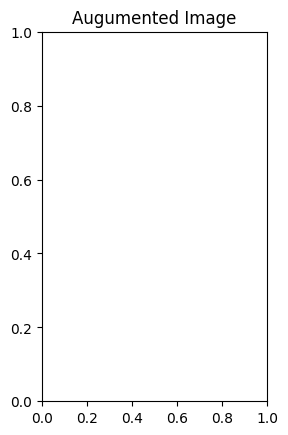

In [14]:
#horizontal flip

updated_data = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)

plt.show()